In [1]:
import pygor.load 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = 'C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/contralateral_OT_singleplane/st66/'


Found 6 custom classes in C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


In [2]:
filename = '2024-8-27_x240827_1_1cOTs.h5'
data_object = pygor.load.Core(data_path+filename)

C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:64: UserWarning: 'wDataCh0_detrended' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-27_x240827_1_1cOTs.h5, setting to np.nan
  self.images = try_fetch(HDF5_file, "wDataCh0_detrended")
C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:75: UserWarning: 'Positions' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-27_x240827_1_1cOTs.h5, setting to np.nan
  self.ipl_depths = try_fetch(HDF5_file, "Positions")
C:\Users\Michael Forsthofer\Coding\pygor\src\pygor\classes\core_data.py:77: UserWarning: 'Snippets0' not found in C:\Users\Michael Forsthofer\OneDrive - University of Sussex\BadenLab\2p-imaging\contralateral_OT_singleplane\st66\2024-8-27_x240827_1_1cOTs.h5, setting to np.nan
  self.snippets = try_fetch(HDF5_file, "Snippets0"

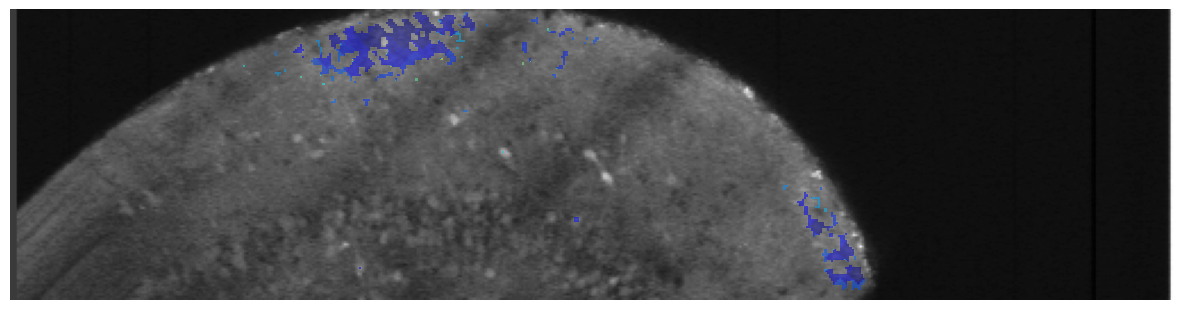

In [3]:
data_object.view_stack_rois(labels=False, figsize_scale=3, func='average_stack')

<b>Find where rois are located</b>

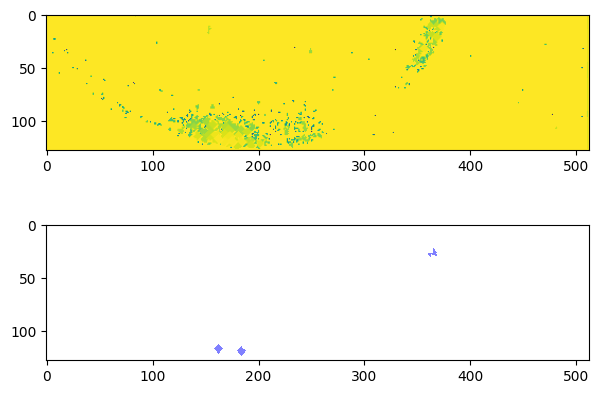

In [4]:
f, ax = plt.subplots(2, 1, figsize=(7, 5))
ax[0].imshow(data_object.rois)

from matplotlib.colors import ListedColormap
data = data_object.rois
values_to_plot = [-1, -5, -46]
mask = np.isin(data, values_to_plot)
cmap = ListedColormap([(0, 0, 1, 0), (0, 0, 1, 0.5)]) 
ax[1].imshow(mask, cmap=cmap, interpolation='none')


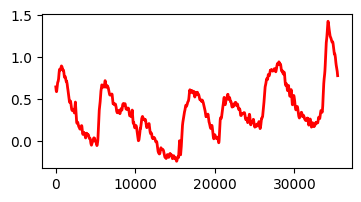

In [169]:
from scipy.stats import bootstrap

f1, ax1 = plt.subplots(1, 1, figsize=(4, 2))
#ax1.plot(data_object.averages.transpose(), color='grey', alpha=0.2, linewidth=0.5)
mean_roi_activity = np.mean(data_object.averages, axis=0)
plt.plot(mean_roi_activity, color='red', alpha=1, linewidth=2)

traces = data_object.averages

#roi_activity_CI = bootstrap(traces, np.nanmean, vectorized=True, axis=1 confidence_level = 0.95, n_resamples=100, random_state=1, method='percentile')

# ax1.fill_between(mean_roi_activity, mean_roi_activity-roi_activity_CI.confidence_interval.low, mean_roi_activity+roi_activity_CI.confidence_interval.high, color=cur_clr, alpha=0.2)
# #ax1.fill_between(np.arange(0, len(mean_roi_activity), 1), mean_roi_activity-np.nanstd(data_object.averages, axis=0), mean_roi_activity+np.nanstd(data_object.averages, axis=0), color='grey', alpha=0.5)
# f1.tight_layout()
# f1.savefig('averages.svg')

In [6]:
traces

array([[ 6.0558367 ,  6.048682  ,  6.0415273 , ...,  8.198384  ,
         8.177622  ,  8.1568575 ],
       [ 4.626031  ,  4.611276  ,  4.596521  , ...,  5.90048   ,
         5.8822513 ,  5.8640227 ],
       [-0.9521805 , -0.95068246, -0.94918454, ..., -1.2924175 ,
        -1.2934332 , -1.2944487 ],
       ...,
       [-0.16284412, -0.16077407, -0.158704  , ...,  0.09482656,
         0.09675627,  0.09868599],
       [-0.20917687, -0.21139626, -0.21361569, ..., -0.5226977 ,
        -0.5194663 , -0.516235  ],
       [ 0.6402153 ,  0.62996167,  0.61970794, ...,  0.94145924,
         0.9329104 ,  0.92436147]], dtype=float32)

<b>Get mean traces</b>

<b>Get stimulus triggers</b>

In [7]:
print(data_object.ms_dur)
print(data_object.frame_hz)
print(len(data_object.triggerstimes_frame))
print(data_object.linedur_s)
print(data_object.trigger_mode)


35426
3.9941205978393555
66
0.001955999992787838
11


In [8]:
def flexible_reshape(array, columns):
    # Calculate the number of elements to keep
    elements_to_keep = (len(array) // columns) * columns
    # Reshape the array
    reshaped_array = array[:elements_to_keep].reshape(-1, columns)
    return reshaped_array

triggertimes_ms = (data_object.triggerstimes_frame-data_object.triggerstimes_frame[0])/data_object.frame_hz/data_object.linedur_s

mean_triggertimes_ms = flexible_reshape(triggertimes_ms, data_object.trigger_mode)
mean_triggertimes_ms = np.mean(mean_triggertimes_ms, axis=0)-np.mean(mean_triggertimes_ms, axis=0)[0]

In [9]:
print(data_object.triggertimes)
print(mean_triggertimes_ms)

5000/5120

[  8  18  23  28  38  43  48  58  63  68  71  77  87  92  97 107 112 117
 127 133 137 141 147 157 162 167 177 182 187 197 202 207 210 216 226 231
 236 246 251 256 266 271 276 279 285 295 300 305 315 320 325 335 340 345
 348 354 364 369 374 384 390 395 404 410 415 418]
[    0.          5120.00009138  7701.33347078 10218.66684904
 15317.33360671 17984.00032097 20544.00036666 25578.66712318
 28266.66717115 30784.00054941 32362.66724425]


0.9765625

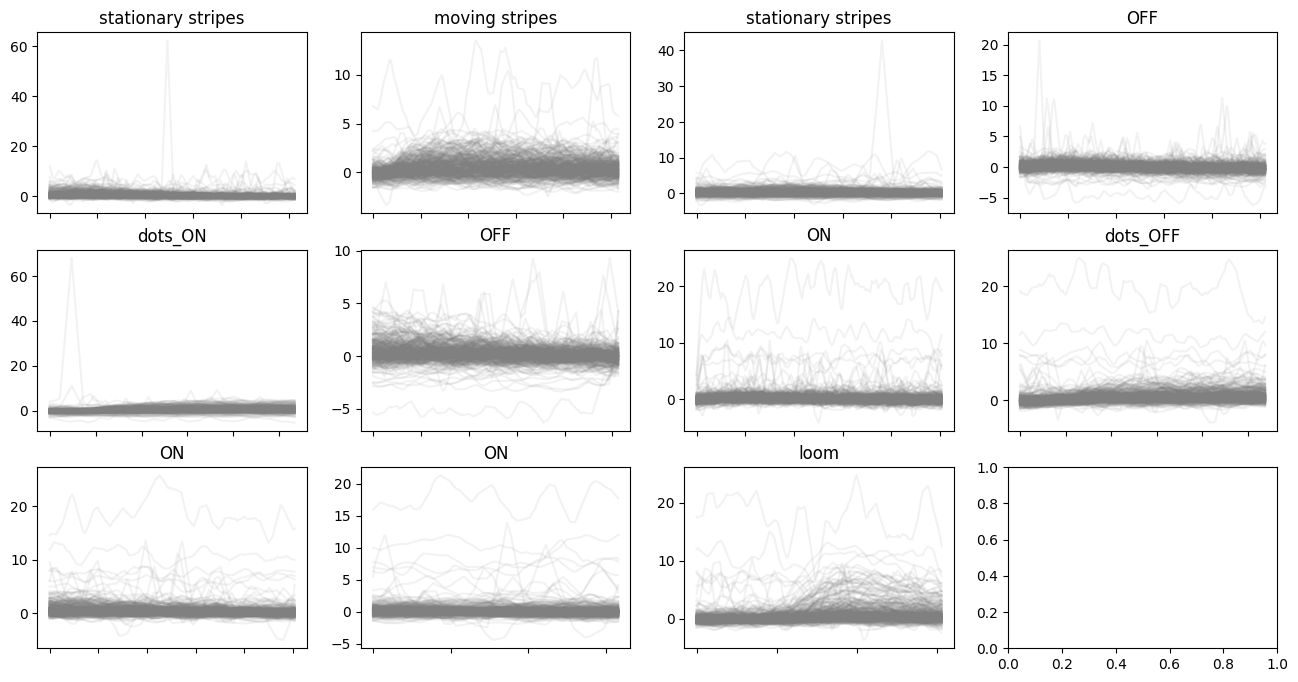

In [10]:
traces = data_object.averages
mean_triggertimes_extended = np.round(np.append(mean_triggertimes_ms, len(traces.transpose()))).astype(int)
stimtypes = ['stationary stripes','moving stripes','stationary stripes','OFF','dots_ON','OFF','ON','dots_OFF','ON', 'ON', 'loom']
stim_responses = []

f, ax = plt.subplots(3, 4, figsize=(16, 8))

for idx, i in enumerate(mean_triggertimes_extended[:-1]):
    stim_responses.append(traces[:,i:mean_triggertimes_extended[idx+1]].transpose())  


for idx, i in enumerate(stim_responses):
    ax[idx//4, idx%4].plot(i, color='gray', alpha=0.1)  
    ax[idx//4, idx%4].set_xticklabels([])
    ax[idx//4, idx%4].set_title(stimtypes[idx])
    #ax[idx%3, idx//3].set_ylim(-5, 5)

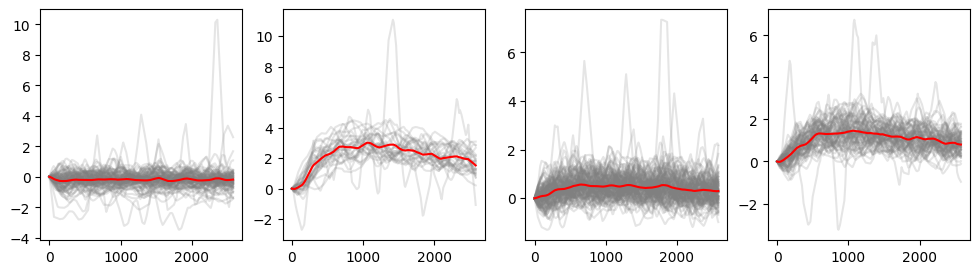

In [170]:
from sklearn import cluster

stim_clusters = []

dots_OFF = stim_responses[1]-stim_responses[1][1,:]
dots_off = dots_OFF.transpose()

kmeans_data = cluster.KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans_data.fit(dots_off)
labels = kmeans_data.labels_

f, ax = plt.subplots(1, 4, figsize=(12, 3))
for idx, i in enumerate(np.unique(labels)):
    ax[idx].plot(dots_off[labels==i,:].transpose(), color='gray', alpha=0.2)
    ax[idx].plot(np.mean(dots_off[labels==i,:].transpose(), axis=1), color='r')


[0.59892875 0.11977027 0.0804842  0.04574336 0.04345319]


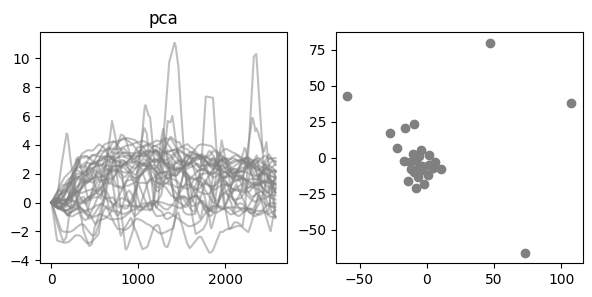

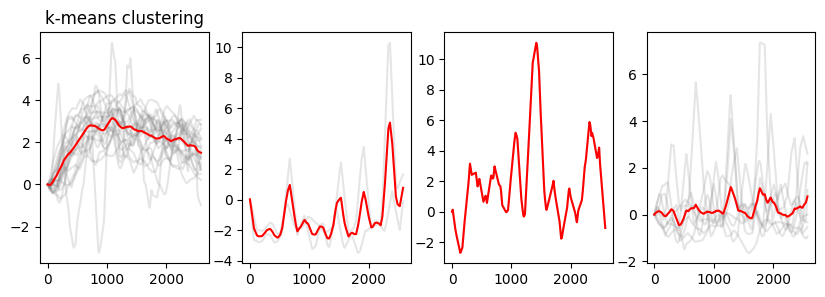

In [171]:
f, ax = plt.subplots(1,2, figsize=(7, 3))
f2, ax2 = plt.subplots(1,4, figsize=(10, 3))

downsampled_cutouts = dots_off[:,::100]

cutout_means = abs(np.mean(dots_off, axis=1))
cutout_stds = abs(np.std(dots_off, axis=1))
cutouts_filtered = dots_off[np.where((cutout_stds>0.0) & (cutout_stds>0.8))[0],:]

ax[0].set_title('pca')
pca = PCA(n_components = 5)
principal_components = pca.fit_transform(cutouts_filtered)
ax[1].scatter(principal_components[:,1], principal_components[:,2], color='gray')
print(pca.explained_variance_ratio_)
ax[0].plot(cutouts_filtered.transpose(), color='grey', alpha=0.5)

kmeans_data = cluster.KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans_data.fit(cutouts_filtered)
labels = kmeans_data.labels_

ax2[0].set_title('k-means clustering')
for idx, i in enumerate(np.unique(labels)):
    ax2[idx].plot(cutouts_filtered[labels==i,:].transpose(), color='gray', alpha=0.2)
    ax2[idx].plot(np.mean(cutouts_filtered[labels==i,:].transpose(), axis=1), color='r')

[0.34733152 0.22442001 0.10582747 0.05643829 0.04985859 0.04421137
 0.03011054 0.02828899 0.01502844 0.01271392]


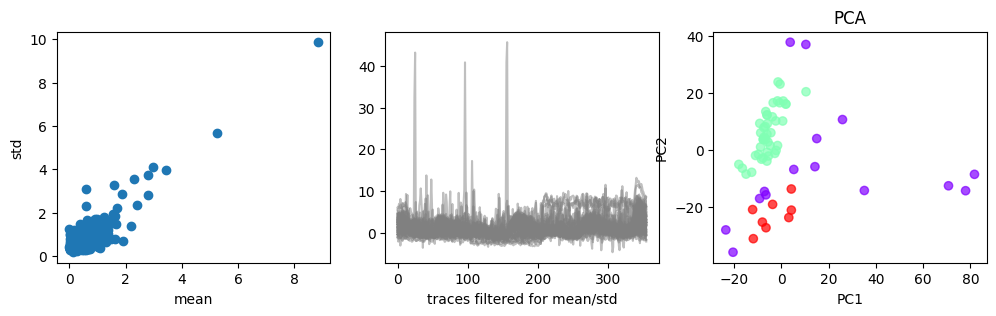

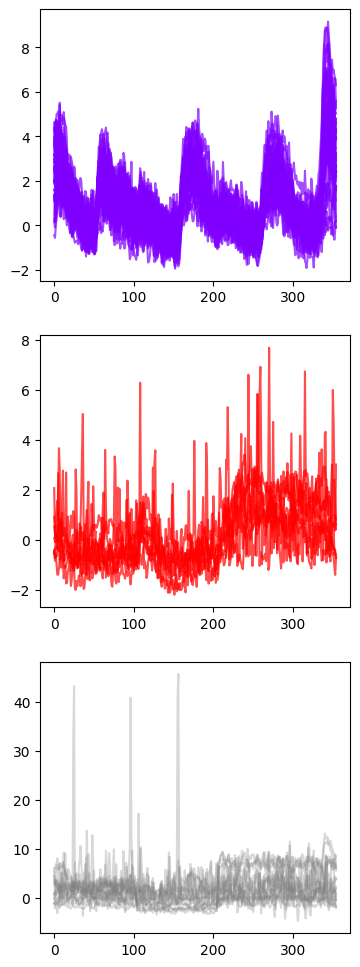

In [174]:
from sklearn.decomposition import PCA
from sklearn.cluster import HDBSCAN
downsampled_traces = data_object.averages[:,::100]

lower_lim = 0.8
upper_lim = 5

f, ax = plt.subplots(1,3, figsize=(12,3))
trace_means = abs(np.mean(downsampled_traces, axis=1))
trace_stds = abs(np.std(downsampled_traces, axis=1))
downsampled_traces_filtered = downsampled_traces[np.where((trace_stds<5) & (trace_stds>0.8)) [0],:]
ax[0].plot(trace_means, trace_stds, 'o')
ax[0].set_xlabel('mean')
ax[0].set_ylabel('std')
ax[1].plot(downsampled_traces_filtered.transpose(), color='grey', alpha=0.5)
ax[1].set_xlabel('traces filtered for mean/std')


pca = PCA(n_components = 10)
principal_components = pca.fit_transform(downsampled_traces_filtered)
#ax[2].scatter(principal_components[:,0], principal_components[:,1], color='gray')
ax[2].set_title('PCA')
ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')
print(pca.explained_variance_ratio_)

hdb = HDBSCAN(min_cluster_size=4)
clusters = hdb.fit_predict(principal_components)
ax[2].scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='rainbow', alpha=0.7)

f2, ax2 = plt.subplots(3,1, figsize=(4, 12))
for i, trace in enumerate(downsampled_traces_filtered):
    if clusters[i] == -1:  # Noise points
        ax2[clusters[i]].plot(trace, color='gray', alpha=0.3)
    else:
        ax2[clusters[i]].plot(trace, color=plt.cm.rainbow(clusters[i] / np.max(clusters)), alpha=0.7)

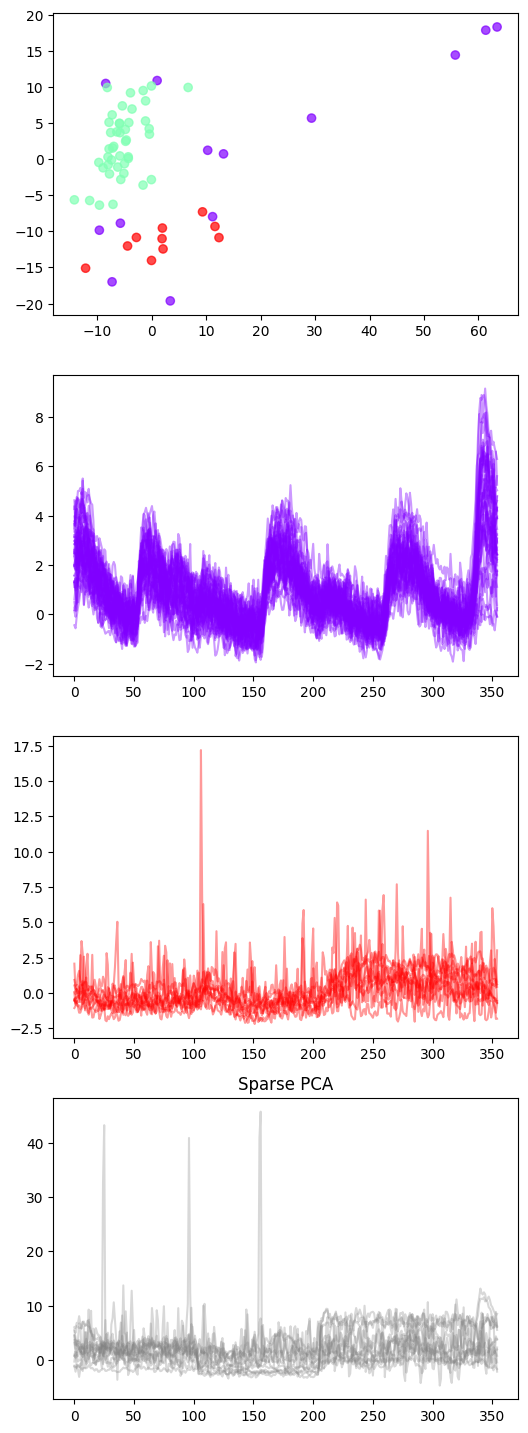

In [162]:
from sklearn.decomposition import SparsePCA

f, ax = plt.subplots(4,1, figsize=(6,18))
sparse_pca = SparsePCA(n_components = 8, alpha=1.5, n_jobs=-1)
sparse_principal_components = sparse_pca.fit_transform(downsampled_traces_filtered)
#ax[0].scatter(sparse_principal_components[:,0], sparse_principal_components[:,1], color='green')
plt.title('Sparse PCA')

hdb = HDBSCAN(min_cluster_size=4)
clusters = hdb.fit_predict(sparse_principal_components)
ax[0].scatter(sparse_principal_components[:, 0], sparse_principal_components[:, 1], c=clusters, cmap='rainbow', alpha=0.7)

for i, trace in enumerate(downsampled_traces_filtered):
    if clusters[i] == -1:  # Noise points
        ax[clusters[i]].plot(trace, color='gray', alpha=0.3)
    else:
        ax[clusters[i]+1].plot(trace, color=plt.cm.rainbow(clusters[i] / np.max(clusters)), alpha=0.4)

Plot rois by cluster allocation

Calculate how many clusters are suitable for k-means

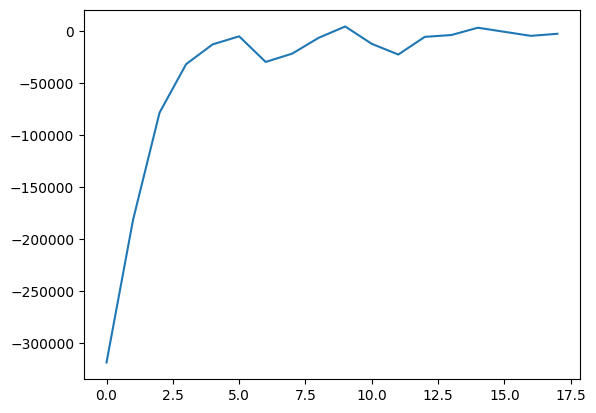

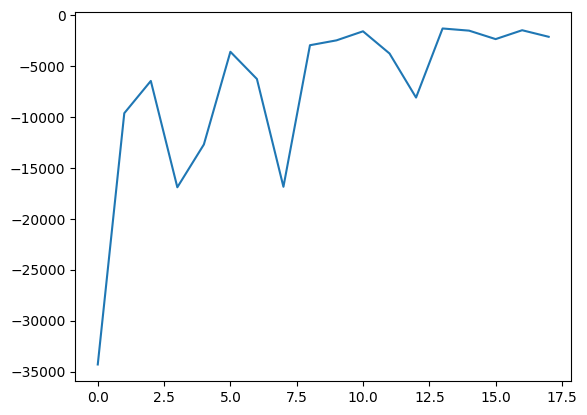

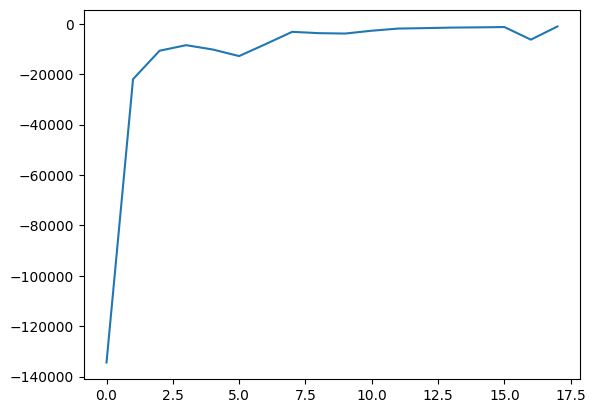

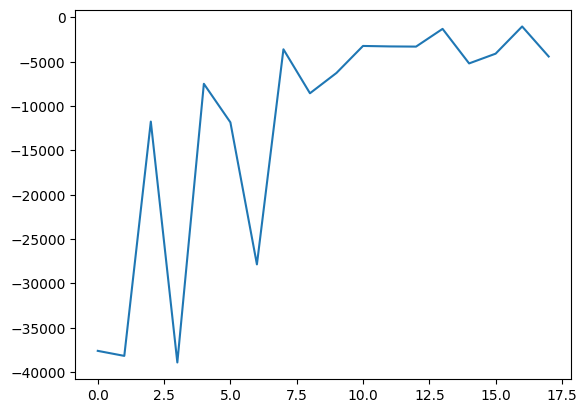

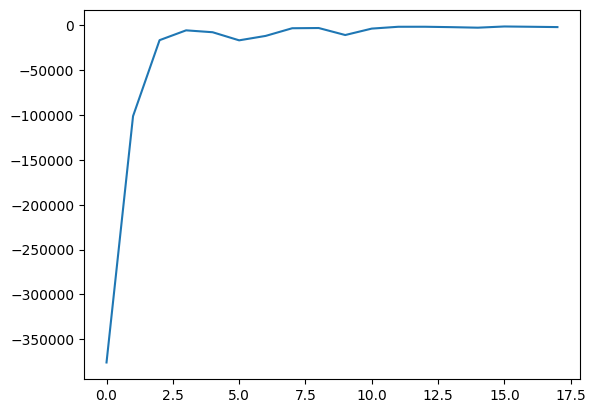

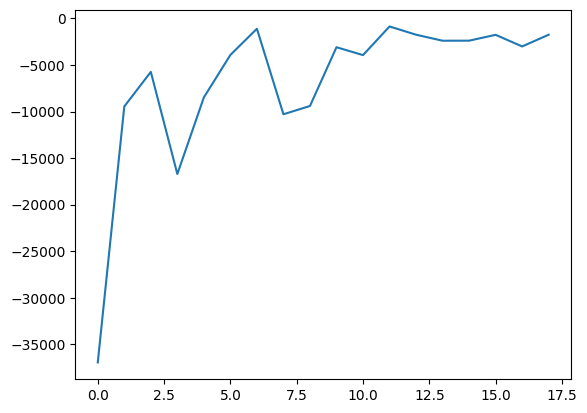

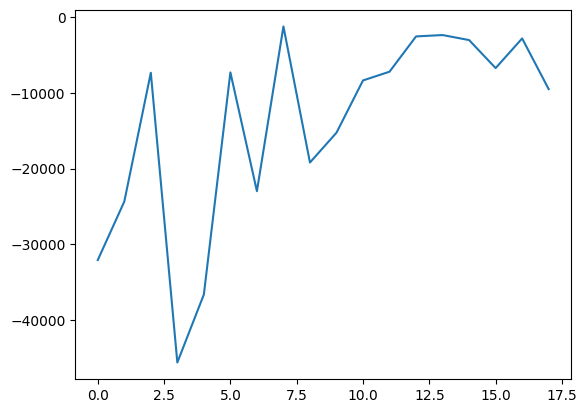

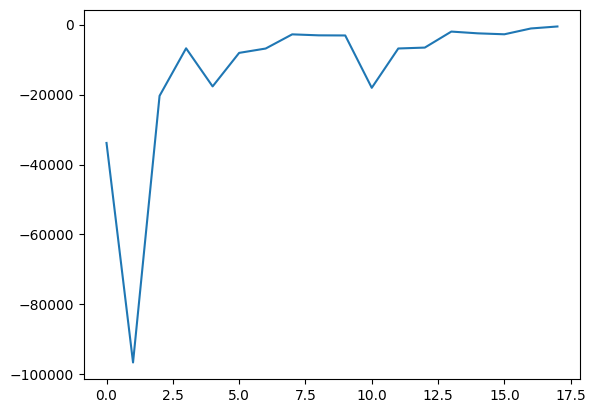

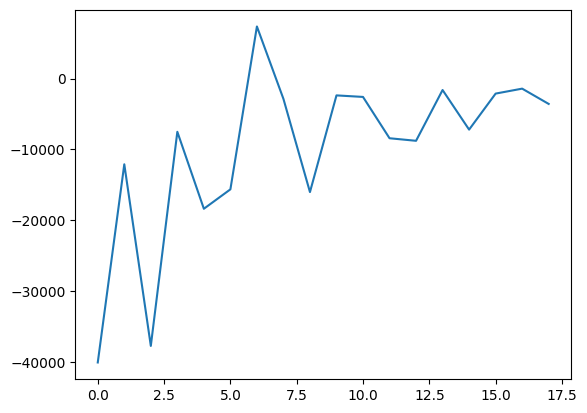

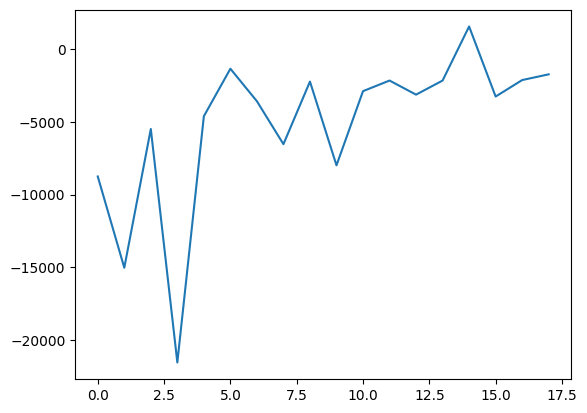

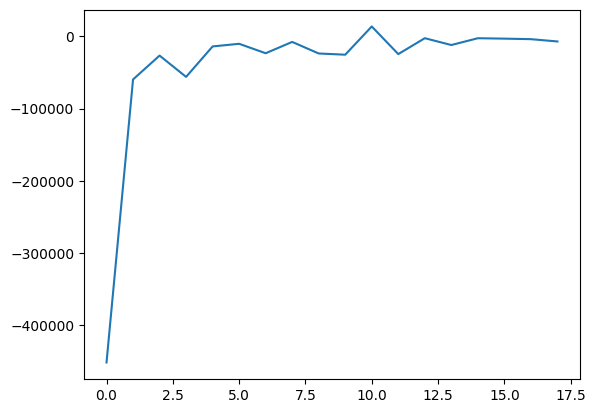

In [32]:
n_clusters_list = []

from scipy.optimize import curve_fit
from scipy.optimize import fsolve

def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def find_percent_drop(x, a, b, c, target_value):
    return exp_decay(x, a, b, c) - target_value

#find out hwo many clusters we need for each response section
for iter_responses in stim_responses:
    i_responses = iter_responses-np.mean(iter_responses, axis=0)
    cost = []
    n_clust = 20
    for i in range(1, n_clust):
        kmeans_data = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
        kmeans_data.fit(i_responses.transpose())
        cost.append(kmeans_data.inertia_)
    f, ax = plt.subplots()
    ax.plot((np.diff(cost)))

    # x = np.arange(0, len(cost))
    
    # initial_guess = [500000, 2, 100000]

    # popt, pcov = curve_fit(exp_decay, x, cost, p0=initial_guess, maxfev=2000)
    # a, b, c = popt
    # x_fit = np.linspace(min(x), max(x), 100)
    # y_fit = exp_decay(x_fit, *popt)
    # #ax.plot(x_fit, y_fit, label=f"Fitted function: y = {a:.2f} * exp(-{b:.2f} * x) + {c:.2f}", color='red')

    # initial_value = a+c  # y at x = 0
    
    # target_value = c + 0.1 * (initial_value-c) 
    # print(initial_value, target_value)
    # x_percent_drop = fsolve(find_percent_drop, x0=1, args=(a, b, c, target_value))[0]
    # plt.axvline(x_percent_drop)

    n_clusters = len(np.where(abs(np.diff(np.diff(cost)))/abs(np.diff(np.diff(cost)))[-1]>5)[0])
    n_clusters_list.append(round(x_percent_drop))

In [33]:
cluster_labels = []
#get the clusters for each response
for idx, i in enumerate(n_clusters_list):
    i_responses = stim_responses[idx]-np.mean(stim_responses[idx], axis=0)
    kmeans_data = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_data.fit(i_responses.transpose())
    cluster_labels.append(kmeans_data.labels_)


C:\Users\Michael Forsthofer\AppData\Local\Temp\ipykernel_1616\142156462.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv')(np.linspace(0, 1, 11))
C:\Users\Michael Forsthofer\AppData\Local\Temp\ipykernel_1616\142156462.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  clustcolors = plt.cm.get_cmap('hsv')(np.linspace(0, 1, 20))


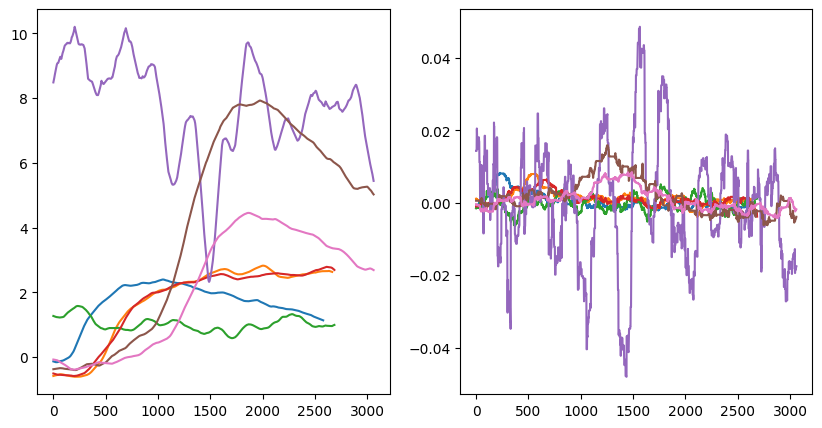

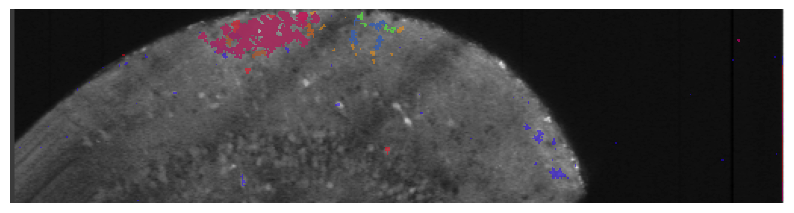

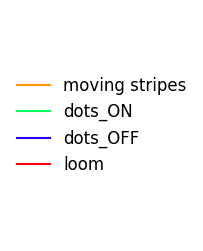

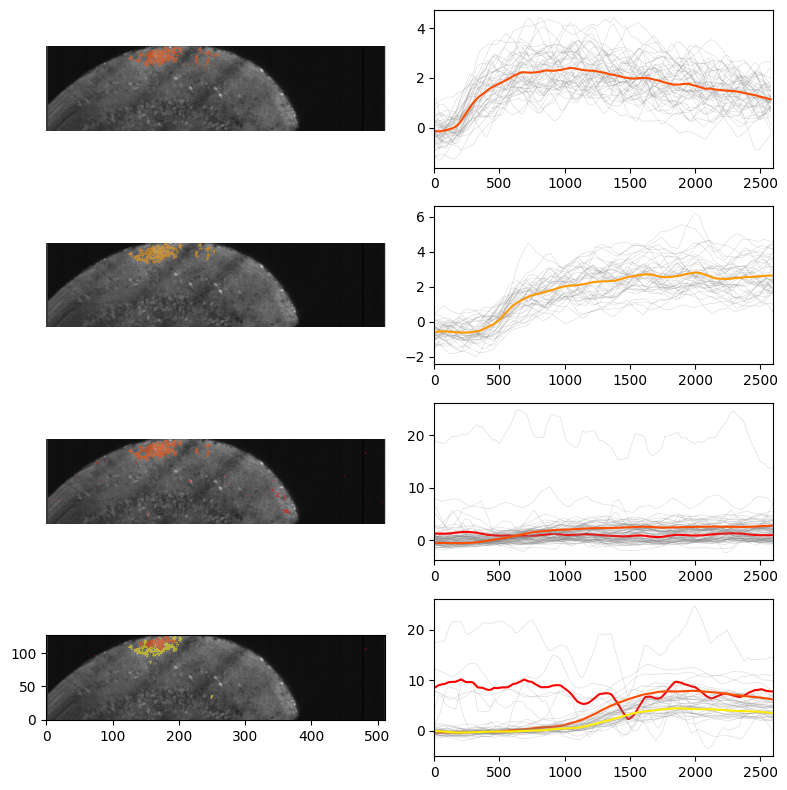

In [34]:
min_traces_per_cluster = 2
clust_thresh = 0.005

stimuli_to_plot = ['moving stripes', 'dots_ON', 'dots_OFF', 'loom']
#stimuli_to_plot = ['stationary stripes','moving stripes','stationary stripes','OFF','dots_ON','OFF','ON','dots_OFF','ON',]
#stimuli_to_plot = ['dots_OFF']
n_traces = np.zeros(len(stimuli_to_plot))
colors = plt.cm.get_cmap('hsv')(np.linspace(0, 1, 11))
clustcolors = plt.cm.get_cmap('hsv')(np.linspace(0, 1, 20))
f, ax = plt.subplots(1, 2, figsize=(10, 5))
f2, ax2 = plt.subplots(1, 1, figsize=(10, 5))
f3, ax3 = plt.subplots(1, 1, figsize=(1.5, 3))
f4, ax4 = plt.subplots(len(stimuli_to_plot), 2, figsize=(8,8))

for background_image in range(len(stimuli_to_plot)):
    ax4[background_image, 0].imshow(data_object.average_stack, cmap="Greys_r", origin="lower")

handles_labels = {}
ax2.imshow(data_object.average_stack, cmap="Greys_r", origin="lower")
stim_responsive_clusters = []
for idx_stim, cur_label_array in enumerate(cluster_labels):
    for idx_label, cur_label in enumerate(np.unique(cur_label_array)):
        cur_cluster_mean = np.mean(stim_responses[idx_stim][:, cur_label_array == cur_label], axis=1)
        if idx_stim > -1:
            if np.shape(stim_responses[idx_stim][:, cur_label_array == cur_label])[1] >= min_traces_per_cluster:
                if np.max(np.diff(cur_cluster_mean) > clust_thresh):
                    if stimtypes[idx_stim] in stimuli_to_plot:    
                        found_rois = (np.where(cur_label_array == cur_label)[0] + 1) * -1
                        mask = np.isin(data, found_rois)

                        # Plot cluster means and differences
                        ax[0].plot(cur_cluster_mean)
                        ax[1].plot(np.diff(cur_cluster_mean))

                        # Create a colored overlay where only the mask part is colored
                        color = colors[idx_stim]  # Select the color for the current idx_stim
                        clustcolor=clustcolors[cur_label]
                        colored_mask = np.zeros((*mask.shape, 4))  # Create an RGBA image (shape + 4 for RGBA)
                        clust_mask = np.zeros((*mask.shape, 4))
                        if idx_stim not in handles_labels:
                            ax3.plot(0, 0, color=color, label=stimtypes[idx_stim])
                            handles_labels[idx_stim] = f'Stim {idx_stim}'  # Track the label
                        
                        # Apply color only to the ROI parts of the mask
                        colored_mask[mask] = np.array([*color[:3], 0.5])  # Use the RGB values from the colormap and set alpha to 0.5
                        clust_mask[mask] = np.array([*clustcolor[:3], 0.5])  # Use the RGB values from the colormap and set alpha to 0.5

                        # Plot the colored mask over the background
                        ax2.imshow(colored_mask, interpolation='none', origin="lower")
                        try:
                            index_of_dots_ON = stimuli_to_plot.index(stimtypes[idx_stim])
                            ax4[index_of_dots_ON, 0].imshow(clust_mask, interpolation='none', origin="lower")
                            ax4[index_of_dots_ON, 1].plot(stim_responses[idx_stim][:, cur_label_array == cur_label], color='grey', alpha=0.3, linewidth=0.4)
                            ax4[index_of_dots_ON, 1].plot(cur_cluster_mean, color=clustcolor, linewidth=1.5)
                            #ax4[index_of_dots_ON, 1].set_ylim([-6, 15])
                            ax4[index_of_dots_ON, 1].set_xlim([0, 2600])
                            n_traces[index_of_dots_ON] = n_traces[index_of_dots_ON] + len(stim_responses[idx_stim][:, cur_label_array == cur_label].transpose())
                        except:
                            print('stim not in list')
                        
ax2.axis('off')
ax3.axis('off')
ax4[0,0].axis('off')
#ax4[0,1].axis('off')
ax4[1,0].axis('off')
#ax4[1,1].axis('off')
ax4[2,0].axis('off')
#ax4[2,1].axis('off')
f4.tight_layout()
# Make the legend take up the whole figure
ax3.legend(loc='center', bbox_to_anchor=(0.5, 0.5), fontsize=12, ncol=1, frameon=False)

f4.savefig('roiclusters.svg')



In [35]:
n_traces

array([47., 41., 88., 45.])

Try other clustering methods: self-organizing maps (SOM)

In [36]:
# # Algorithms
# from minisom import MiniSom
# import pickle

# def plot_som_series_averaged_center(som_x, som_y, win_map):
#     fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
#     fig.suptitle('Clusters')
#     for x in range(som_x):
#         for y in range(som_y):
#             cluster = (x,y)
#             if cluster in win_map.keys():
#                 for series in win_map[cluster]:
#                     axs[cluster].plot(series,c="gray",alpha=0.5) 
#                 axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
#             cluster_number = x*som_y+y+1
#             axs[cluster].set_title(f"Cluster {cluster_number}")


# def get_som_series_averaged_center(som_x, som_y, win_map):
#     clustered_traces = []
#     cluster_averages = []
#     for x in range(som_x):
#         for y in range(som_y):
#             cluster = (x,y)
#             if cluster in win_map.keys():
#                 clustered_traces.append(np.vstack(win_map[cluster]))
#                 cluster_averages.append(np.average(np.vstack(win_map[cluster]),axis=0))
#     return clustered_traces, cluster_averages

# som_x = som_y = 3 #math.ceil(math.sqrt(math.sqrt(len(traces))))
# traces = dots_OFF.transpose()
# som = MiniSom(som_x, som_y,len(traces[0]), sigma=0.5, learning_rate = 0.2, neighborhood_function='mexican_hat', random_seed=10)
# som.random_weights_init(traces)
# som.train(traces, 50000)

# #save the SOM
# with open('C:/Users/Michael Forsthofer/OneDrive - University of Sussex/BadenLab/2p-imaging/clustering analysis/mexicamhat_sigma1.5_randomseed10_lr0.1', 'wb') as outfile:
#     pickle.dump(som, outfile)

# win_map = som.win_map(traces)

# plot_som_series_averaged_center(som_x, som_y, win_map)

# clustered_traces, cluster_averages = get_som_series_averaged_center(som_x, som_y, win_map)

# f, ax = plt.subplots(len(cluster_averages), 1, figsize=(7, 30))
# for i in range(len(cluster_averages)):
#     ax[i].plot(clustered_traces[i], color='r')
#     ax[i].plot(cluster_averages[i], color='r')
#     ax[i].set_xticklabels([])
#     ax[i].set_yticklabels([])
#     ax[i].set_xlim(0, len(cluster_averages[i]))
#     ax[i].spines['top'].set_visible(False)
#     ax[i].spines['right'].set_visible(False)
#     ax[i].spines['bottom'].set_visible(False)
#     ax[i].spines['left'].set_visible(False)

# ax.tight_layout()
